In [1]:
import sqlite3

# Step 1: Connect to SQLite DB (creates file if it doesn't exist)
conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

# Step 2: Create a table
cursor.execute("""
CREATE TABLE IF NOT EXISTS sales (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    product TEXT NOT NULL,
    quantity INTEGER NOT NULL,
    price REAL NOT NULL
)
""")

# Step 3: Insert sample sales data
sample_data = [
    ("Product A", 10, 15.5),
    ("Product B", 5, 30.0),
    ("Product A", 3, 15.5),
    ("Product C", 8, 22.0),
    ("Product B", 7, 30.0)
]

cursor.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)

# Save changes and close connection
conn.commit()
conn.close()


In [2]:
import sqlite3
import pandas as pd

# Step 1: Connect to the database
conn = sqlite3.connect("sales_data.db")

# Step 2: Write SQL query
query = """
SELECT 
    product, 
    SUM(quantity) AS total_qty, 
    SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""

# Step 3: Load result into pandas DataFrame
df = pd.read_sql_query(query, conn)

# Step 4: Print the result
print(df)

# Close the connection
conn.close()


     product  total_qty  revenue
0  Product A         13    201.5
1  Product B         12    360.0
2  Product C          8    176.0


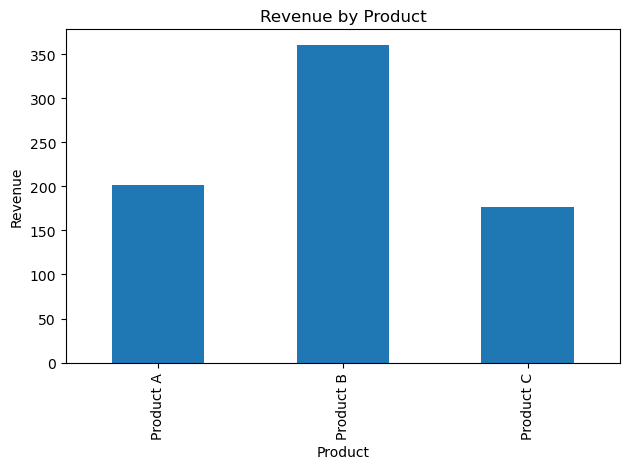

In [3]:
import matplotlib.pyplot as plt

# Step 1: Plot bar chart
df.plot(kind='bar', x='product', y='revenue', legend=False)

# Step 2: Customize chart
plt.title("Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Revenue")
plt.tight_layout()

# Step 3 (Optional): Save the chart as an image
plt.savefig("sales_chart.png")

# Step 4: Show the chart
plt.show()
